# Operaciones de aprendizaje automático - TC5044.10

## Preprocesamiento de Datos - Steel Industry Energy Consumption


Grupo 10 - Equipo 17:

Emanuel Flores Martínez - A01796497

Flavio César Palacios Salas - A01797223

Luis Enrique González González - A01795338

Fanny Betsabé Fuentes Reyes - A00570705

Iván Nava Cardeño - A01361985

## Análisis y Procesamiento de Datos de Consumo Energético en la Industria del Acero.


### Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga y Exploración Inicial

In [ ]:
try:
    df = pd.read_csv(r"/content/drive/MyDrive/3. Educación/3.1. MNA/3.1.10. Operaciones de aprendizaje automático/Actividades/Proyecto Fase 1/steel_energy_original.csv")
except FileNotFoundError:
    print("Error: No encontramos el archivo 'steel_energy_original.csv'.")
    print("Por favor, asegúrate de que el archivo esté en la ubicación correcta.")
    exit()

# Mostramos las primeras 5 filas para una vista previa de los datos.
print("--- Primeras 5 filas de los datos originales ---")
print(df.head())
print("\n" + "="*50 + "\n")

# Obtenemos un resumen general del DataFrame.
print("--- Información General del DataFrame ---")
df.info()
print("\n" + "="*50 + "\n")

# Generamos estadísticas descriptivas para las columnas numéricas.
print("--- Estadísticas Descriptivas ---")
print(df.describe())
print("\n" + "="*50 + "\n")

--- Primeras 5 filas de los datos originales ---
               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                    

### Limpieza y Preprocesamiento de Datos

In [ ]:
# Renombramos las columnas a un formato más manejable.
df.columns = [
    'date', 'usage_kwh', 'lagging_current_reactive_power_kvarh',
    'leading_current_reactive_power_kvarh', 'co2_tco2',
    'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
    'week_status', 'day_of_week', 'load_type'
]

# Convertimos la columna 'date' al formato datetime para análisis temporal.
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# Verificamos y eliminamos filas duplicadas si existen.
if df.duplicated().sum() > 0:
    print(f"Encontramos y eliminamos {df.duplicated().sum()} filas duplicadas.")
    df.drop_duplicates(inplace=True)
else:
    print("No encontramos filas duplicadas.")

# Revisamos si hay valores nulos en el conjunto de datos.
if df.isnull().sum().sum() > 0:
    print("\nValores nulos encontrados por columna:")
    print(df.isnull().sum())

else:
    print("\nNo encontramos valores nulos.")
print("\n" + "="*50 + "\n")

No encontramos filas duplicadas.

No encontramos valores nulos.




### Ingeniería de Características

In [ ]:
# Extraemos nuevas características a partir de la columna 'date'.
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

# Establecemos la columna 'date' como el índice del dataframe.
df.set_index('date', inplace=True)

### Guardado y Visualización

In [ ]:
# Mostramos las primeras 5 filas del dataframe ya procesado.
print("--- Primeras 5 filas de los datos procesados ---")
print(df.head())
print("\n" + "="*50 + "\n")

# Definimos la ruta base para guardar archivos en Google Drive.
drive_path = r"/content/drive/MyDrive/3. Educación/3.1. MNA/3.1.10. Operaciones de aprendizaje automático/Actividades/Proyecto Fase 1/"

# Guardamos el dataframe procesado en un nuevo archivo CSV.
processed_file_path = drive_path + "steel_energy_processed.csv"
df.to_csv(processed_file_path)
print(f"Guardamos los datos procesados en: '{processed_file_path}'")

--- Primeras 5 filas de los datos procesados ---
                     usage_kwh  lagging_current_reactive_power_kvarh  \
date                                                                   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  3.28   
2018-01-01 01:00:00       3.31                                  3.56   
2018-01-01 01:15:00       3.82                                  4.50   

                     leading_current_reactive_power_kvarh  co2_tco2  \
date                                                                  
2018-01-01 00:15:00                                   0.0       0.0   
2018-01-01 00:30:00                                   0.0       0.0   
2018-01-01 00:45:00                                   0.0       0.0   
2018-01-01 01:00:00                                   0.0       0.0   
2018-01-01 01:15:00 

Guardamos el gráfico en: '/content/drive/MyDrive/3. Educación/3.1. MNA/3.1.10. Operaciones de aprendizaje automático/Actividades/Proyecto Fase 1/usage_kwh_boxplot.png'
Guardamos el gráfico en: '/content/drive/MyDrive/3. Educación/3.1. MNA/3.1.10. Operaciones de aprendizaje automático/Actividades/Proyecto Fase 1/usage_kwh_histogram.png'
Guardamos el gráfico en: '/content/drive/MyDrive/3. Educación/3.1. MNA/3.1.10. Operaciones de aprendizaje automático/Actividades/Proyecto Fase 1/usage_over_time.png'


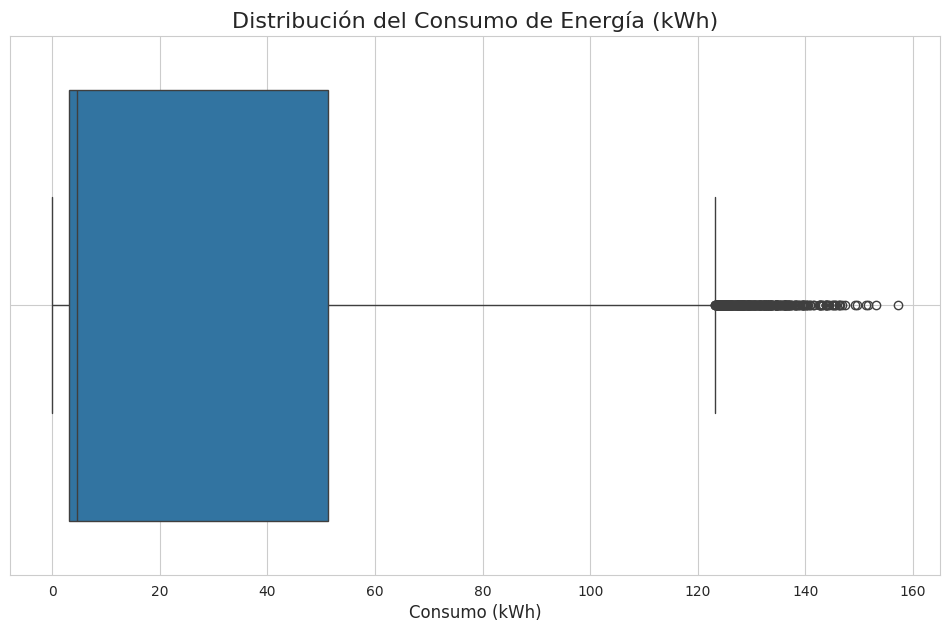

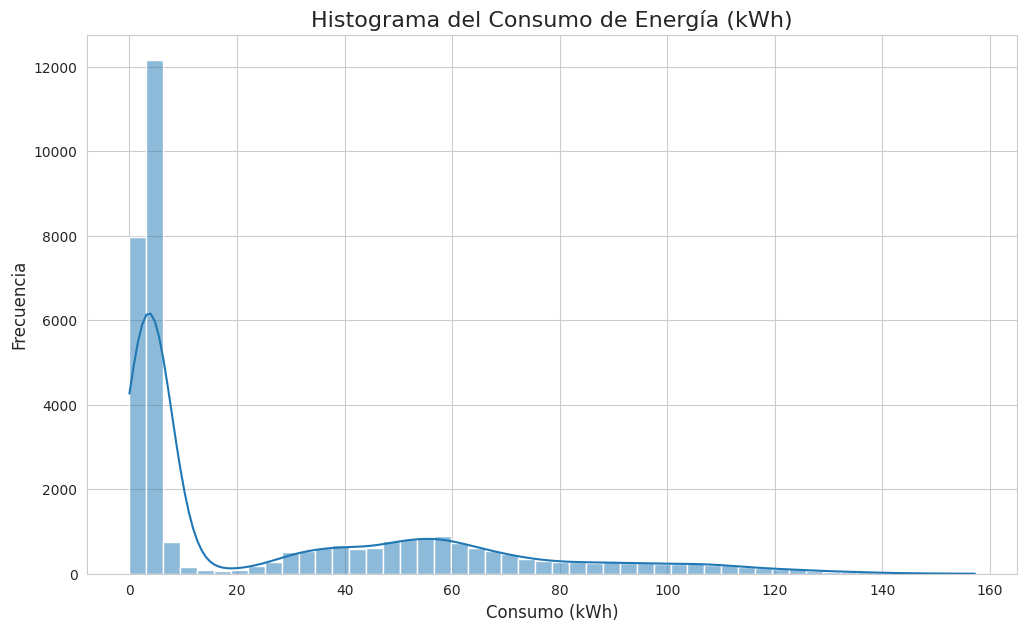

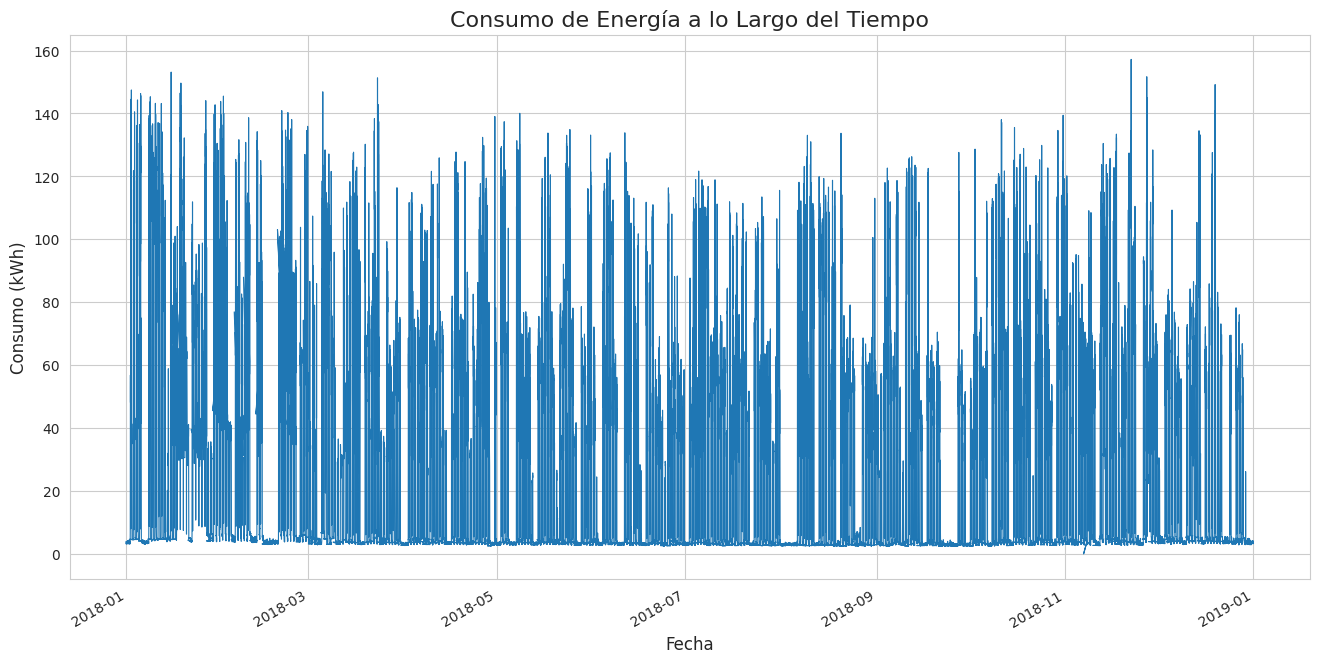

In [ ]:
# Configuramos el estilo de las visualizaciones.
sns.set_style("whitegrid")

# Graficamos un boxplot para visualizar la distribución y los outliers.
plt.figure(figsize=(12, 7))
sns.boxplot(x=df['usage_kwh'])
plt.title('Distribución del Consumo de Energía (kWh)', fontsize=16)
plt.xlabel('Consumo (kWh)', fontsize=12)
plt.grid(True)
plt.savefig(drive_path + 'usage_kwh_boxplot.png')
print(f"Guardamos el gráfico en: '{drive_path}usage_kwh_boxplot.png'")

# Graficamos un histograma para ver la frecuencia del consumo.
plt.figure(figsize=(12, 7))
sns.histplot(df['usage_kwh'], bins=50, kde=True)
plt.title('Histograma del Consumo de Energía (kWh)', fontsize=16)
plt.xlabel('Consumo (kWh)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.savefig(drive_path + 'usage_kwh_histogram.png')
print(f"Guardamos el gráfico en: '{drive_path}usage_kwh_histogram.png'")

# Graficamos una serie temporal del consumo de energía.
plt.figure(figsize=(16, 8))
df['usage_kwh'].plot(linewidth=0.8)
plt.title('Consumo de Energía a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo (kWh)', fontsize=12)
plt.grid(True)
plt.savefig(drive_path + 'usage_over_time.png')
print(f"Guardamos el gráfico en: '{drive_path}usage_over_time.png'")

### Conclusiones

Basándonos en nuestra exploración inicial del conjunto de datos de consumo energético, hemos identificado varias características clave. El dataset contiene un año completo de mediciones detalladas, tomadas cada 15 minutos, lo que nos proporciona una granularidad excelente para el análisis temporal.

Al examinar la distribución del consumo de energía (Usage_kWh) a través del boxplot y el histograma, observamos claramente que la mayoría de las mediciones de consumo se concentran en valores relativamente bajos. Sin embargo, también hemos identificado la presencia de picos significativos de consumo, que se manifiestan como valores atípicos en el boxplot y una cola larga en el histograma. Esta distribución no simétrica es un hallazgo importante que deberemos considerar en futuros análisis o modelado.

Lo más destacado de nuestra exploración, evidenciado por el gráfico de serie temporal, es la marcada estacionalidad en el consumo de energía a lo largo del año. Los patrones repetitivos de picos y valles sugieren fuertemente que el consumo está influenciado por ciclos temporales predecibles, como la hora del día o el día de la semana. Esta estacionalidad es un factor crítico que deberá ser capturado y modelado para predecir con precisión el consumo futuro.

Además, la información general del dataset nos mostró que contamos con datos completos, sin valores nulos, lo cual simplifica la etapa de limpieza. Las variables categóricas como el estado de la semana, el día de la semana y el tipo de carga serán fundamentales para segmentar y entender mejor los patrones de consumo que hemos observado en la serie temporal.

En resumen, tenemos un dataset rico y completo que presenta una distribución del consumo con valores atípicos y, sobre todo, una clara estacionalidad. Estos hallazgos iniciales nos preparan para las próximas etapas de análisis y modelado predictivo, donde buscaremos entender y predecir estos patrones de consumo.